# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


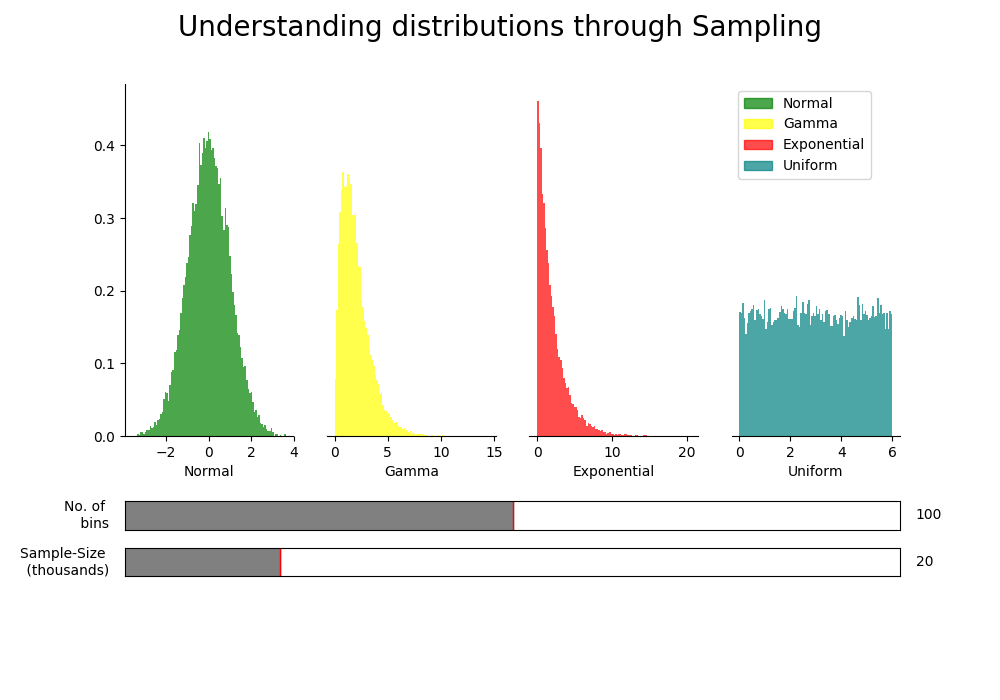

0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider
import matplotlib.patches as mpatches #set up legend with proxy artists 

%matplotlib notebook

n = 1000
b = 100
mult = 20
  
#set up legend with proxy artists 
red_patch = mpatches.Patch(color='red', alpha = 0.7, label='Exponential')
blue_patch = mpatches.Patch(color='teal',alpha = 0.7, label= 'Uniform')
yellow_patch = mpatches.Patch(color='yellow',alpha = 0.7, label= 'Gamma')
green_patch = mpatches.Patch(color='green', alpha = 0.7,label= 'Normal')

#set up figure
fig = plt.figure(figsize = (10,7))
gs = gridspec.GridSpec(5, 4, height_ratios=[5,0.4,0.4,0.4,0.4])
fig.suptitle('Understanding distributions through Sampling',size = 20)

#add subplots
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_ylim([0,0.8]) #set ylim for ax1, used for other graphs as well
ax2 = fig.add_subplot(gs[0, 1],sharey = ax1)
ax3 = fig.add_subplot(gs[0, 2],sharey = ax1)
ax4 = fig.add_subplot(gs[0, 3],sharey = ax1)
plot = [ax1,ax2,ax3,ax4] 

def removeAxes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_visible(False)
    
for ax in plot: 
    removeAxes(ax)
    
ax1.spines['left'].set_visible(True)
ax1.yaxis.set_visible(True)

def draw(b,mult):
    # generate 4 random variables from the random, gamma, exponential, and uniform distributions 
    x1 = np.random.normal(0, 1, n*mult)
    x2 = np.random.gamma(2, 1, n*mult)
    x3 = np.random.exponential(2, n*mult)
    x4 = np.random.uniform(0,6, n*mult)
    
    ax1.cla()
    ax1.hist(x1, normed=True, bins=b,alpha = 0.7 ,color = 'green')
    ax1.set_xlabel('Normal')
    ax2.cla()
    ax2.hist(x2, normed=True, bins=b,alpha = 0.7 ,color = 'yellow')
    ax2.set_xlabel('Gamma')
    ax3.cla()
    ax3.hist(x3, normed=True, bins=b,alpha = 0.7 ,color = 'red')
    ax3.set_xlabel('Exponential')
    ax4.cla()
    ax4.hist(x4, normed=True, bins=b,alpha = 0.7 ,color = 'teal' )
    ax4.set_xlabel('Uniform')
    ax4.legend(handles=[green_patch, yellow_patch, red_patch, blue_patch],loc = 2) # input legend
draw(b,mult)

'''def update(curr):
    if curr == n: 
        a.event_source.stop()
    for ax in plot: #clear plots with drawn graphs
        ax.cla()
    '''
ax5 = fig.add_subplot(gs[2,0:])
binWidg=Slider(ax5, 'No. of \n bins', 0, 200, valinit=100, valfmt = '%1.0f', color='grey')

def bin_update(val):
    for ax in plot: #clear plots with drawn graphs
        ax.cla()
    b = int(binWidg.val)
    draw(b,int(multWidg.val))
binWidg.on_changed(bin_update)

ax6 = fig.add_subplot(gs[3,0:])
multWidg=Slider(ax6, 'Sample-Size \n (thousands)', 0,100, valinit=20, valfmt = '%1.0f', color='grey')

def mult_update(val):
    for ax in plot:
        ax.cla()
    mult = int(multWidg.val)
    draw(int(binWidg.val), mult)
multWidg.on_changed(mult_update)
